#Introduction to convolutional Neural networks and computer vision with tensorflow


#Get the data
We need some image data in our case

In our case we will use the food 101 dataset to classify: (101) classes
but modified to do use 2 classes.

**Note: We start with a small dataset because we need to experiment regularly.**

In [ ]:
import zipfile # Cuz we download it as  a zip file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip #means get this file
#Unzip the downloaded file
zip_ref=zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-11-20 09:37:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.8MB/s    in 5.8s    

2022-11-20 09:37:36 (18.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#Inspect the data(become one with it)
Let's then inspect the unzipped file.

And for a computer vision project we have to visualize many samples of your data

In [ ]:
!ls pizza_steak #List what's inside 

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
#walk through the pizza steak directory and list number of files(to find the dirpath,dirnames and file neames)
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'


In [ ]:
#Another way to find out how many images are in a file
#The previous method loops through all starting from the big directory and getting in and getting dirpath,dirnames and filenames simultaneously
# BUT if we want only a single path file number we can use the 'os.listdir'
num_steaks_images_train=len(os.listdir('pizza_steak/train/steak'))

In [ ]:
num_steaks_images_train
# Which we can check in the previous os.walk directory

750

#2, To visualize our images, first let's get the class names programmatically  

In [ ]:
#Get the class names programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['pizza' 'steak']


In [ ]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  '''Set target directory and class(well view images from here)'''
  target_folder=target_dir+'/'+target_class
  #Get random image path
  random_image=random.sample(os.listdir(target_folder),1)
  #read in the image and plot using plt
  print(random_image)
  img= mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f'Image shape:{img.shape}') #Show the shape of the image
  return img

['495892.jpg']
Image shape:(384, 512, 3)


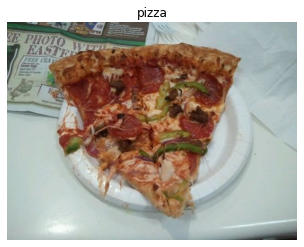

In [ ]:
#View random image form the training dataset
img= view_random_image(target_dir='pizza_steak/train',target_class='pizza')

In [ ]:
img #These are arrays,so we can easily convert this to tensorflow

array([[[ 25,  41,  30],
        [ 27,  43,  32],
        [ 28,  44,  33],
        ...,
        [149, 169, 170],
        [149, 169, 170],
        [150, 170, 169]],

       [[ 27,  50,  34],
        [ 28,  49,  34],
        [ 27,  48,  33],
        ...,
        [145, 165, 166],
        [145, 165, 166],
        [145, 165, 164]],

       [[ 34,  66,  43],
        [ 34,  63,  41],
        [ 32,  61,  39],
        ...,
        [146, 166, 167],
        [144, 164, 165],
        [144, 164, 163]],

       ...,

       [[167, 179, 177],
        [167, 179, 177],
        [167, 179, 177],
        ...,
        [ 22,  16,  18],
        [ 27,  21,  23],
        [ 31,  25,  27]],

       [[167, 179, 177],
        [167, 179, 177],
        [167, 179, 177],
        ...,
        [ 24,  18,  18],
        [ 32,  23,  24],
        [ 38,  29,  32]],

       [[163, 175, 173],
        [164, 176, 174],
        [164, 176, 174],
        ...,
        [ 24,  15,  16],
        [ 30,  21,  22],
        [ 36,  27,  28]]

In [ ]:
#view the image shape
img.shape #returns width,height,color channels

(384, 512, 3)

In [ ]:
# It's often important to preprocess the tensor before giving it to a neural network


#3, SCALE FEATURES(normalize or standardize, neural networks tend to prefer normalization)

In [ ]:
#Getting the values of the tensor between 0 and 1
# Using the img/255 can do it but it does this only for a single image and it's tedious doing for all
# But tensorflow has it easy for us 

### An end-to-end example
Let's build a CNN to find pattern in our images,more specifically we need way to 
* load our images.
* preprocess our images.
* Build a CNN to find patterns.
* Compile our CNN.
* Fit the CNN to our training data.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set the seed
tf.random.set_seed(42)
# Preprocess data(get all pixel values b/n 0 and 1)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
#set up path to our data_directories
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'
#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary')
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data) #it's 47 because 1500/32 batches ~= 47

47

#NOW THAT WE HAVE SEEN IT TAKES A LOT OF TIME,WE"RE GOING TO USE GPU BY CHANGING RUN TIME TYPE to 'GPU'.

In [ ]:
#Build a CNN model
#(same as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(10,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(10,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#Fit the model
history=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
            validation_data=valid_data,validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 19s 223ms/step - loss: 0.6234 - accuracy: 0.6613 - val_loss: 0.4968 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.5049 - accuracy: 0.7680 - val_loss: 0.3942 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4255 - accuracy: 0.8067 - val_loss: 0.3860 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3985 - accuracy: 0.8347 - val_loss: 0.3718 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3397 - accuracy: 0.8620 - val_loss: 0.3157 - val_accuracy: 0.8680


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

In [ ]:
# Trying a non-CNN model on our image data
# We gonna build the model we built on the NN classification
train_data

In [ ]:
#set the random seed
tf.random.set_seed(42)
#create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[224,244,3]),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
#Fit the model to the training data
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))


In [ ]:
#The accuracy is basically guessing 
#So.let's build another model and try to improve accuracy 'by adding more neurons to the layers'

In [ ]:
model_3=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[224,224,3]),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_3.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 8.5646 - accuracy: 0.6147 - val_loss: 5.3376 - val_accuracy: 0.5260
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 2.4929 - accuracy: 0.6853 - val_loss: 1.6878 - val_accuracy: 0.6580
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 1.2650 - accuracy: 0.7260 - val_loss: 1.0723 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 1.1365 - accuracy: 0.7373 - val_loss: 0.6339 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.9349 - accuracy: 0.7453 - val_loss: 2.1764 - val_accuracy: 0.6660


In [ ]:
# model_3 is a bit more good than model_2
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               19267712  
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19,276,033
Trainable params: 19,276,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()
#only 31,101 parameters to learn but better at deciphering image data rather than using the dense layers.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

##The main point is that if you look at the trainable parameters in the NON CNN models is big and big because there'no reduction in dimension as it's feed to the dense layer. So, EVEN IF MODEL_3 PERFORMED BETTER THAN MODEL_2 STILL CONVOLOTION IS MUCH BETTER IN ACCURACY WITH LOWER TRAINABLE PARAMETER

## Breaking our CNN model used earlier

We earlier defined a CNN end to end model but we haven't really broke it down!

# BINARY CLASSIFICATION : LET'S BREAK IT DOWN
1. BECOME ONE WITH THE DATA(VISUALIZE, VISUALIZE,VISUALIZE).
2. PREPROCESS THE DATA(PREPARED IT FOR OUR MODEL,THE MIAN STEP HERE WAS SCALING,NORMALIZING AND BATCHING)
3. CREATED THE MODEL(START WITH A BASELINE).
4. FIT THE MODEL
5. EVALUATE THE MODEL.
6. ADJUST DIFFERENT PARAMATERS AND IMPROVE THE MODEL(TRY TO BEAT OUR BASELINE).
7. REPEAT UNTIL SATISFIED(EXPERIMENT,EXPERIMENT,EXPERIMENT).

##1.  BECOME ONE WITH THE DATA

['980247.jpg']
Image shape:(384, 512, 3)
['2965.jpg']
Image shape:(512, 384, 3)


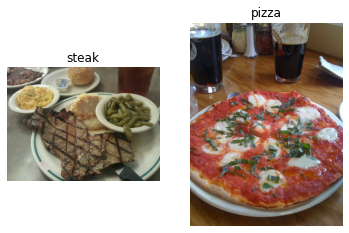

In [ ]:
#Visuallize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image('pizza_steak/train','steak')
plt.subplot(1,2,2)
pizza_img=view_random_image('pizza_steak/train','pizza')

In [ ]:
# AS we can see it has different shapes that's why we need the image datagenerator to rescale the data 
# or change the pixel size to the target size

#2. PREPROCESS THE DATA.

In [ ]:
#DEfine our directory dataset paths
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

Our next step is to turn our data into **bacthes**.
A batch is a samll subset of data rather than looking at 1500 images in our case a model might look 32 at a time.
Why does it does that?

The data might not fit the GPUS memory simultaneously.

Why 32?

Yan Lecun, 'training larger other than 32 is bad.'
INVENTOR OF CONVOLUTIONAL NEURAL NETWORKS.

In [ ]:
#Create the train and test data generatorts and rescale the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1.255)
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary')
test_data=valid_datagen.flow_from_directory(test_dir,batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a  sample of training data batch
images,labels= train_data.next() #Get the next batch of images/labels in train_Data
len(images),len(labels)

(32, 32)

In [ ]:
#How many batches are there
len(train_data) # 1500/32 batches

47

In [ ]:
#Get the 1st 2 images in tensor form of the 1st batch and shape 
images[:2],images[0].shape

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
#View the 1st batch of labels 
labels

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
      dtype=float32)

In [ ]:
# SO we have preprocessed our data (normalize,rescale and batched our data)

# 3. CREATE A CNN MODEL(start with the baseline model)

A baseline is the first model we try to beat by building other models.

ONe of teh best ways to start is 'simple' and complicate more and more.

In [ ]:
#MAke the creating of our model a little bit easier
model_4 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,(3,3),padding='valid',strides=(1,1),activation='relu'),
    tf.keras.layers.Conv2D(10,(3,3),padding='valid',strides=(1,1),activation='relu'),
    tf.keras.layers.Conv2D(10,(3,3),padding='valid',strides=(1,1),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_4.compile (loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
history_4=model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data),
                      )

Epoch 1/5
47/47 [==============================] - 11s 210ms/step - loss: 0.7946 - accuracy: 0.6553 - val_loss: 100.5528 - val_accuracy: 0.6820
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4912 - accuracy: 0.7733 - val_loss: 68.9305 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4644 - accuracy: 0.7853 - val_loss: 56.7206 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3800 - accuracy: 0.8420 - val_loss: 72.2535 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.2691 - accuracy: 0.8993 - val_loss: 65.7306 - val_accuracy: 0.8200


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 flatten_3 (Flatten)         (None, None)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 140ms/step - loss: 0.3157 - accuracy: 0.8680


[0.31565558910369873, 0.8679999709129333]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#5. Evaluate our model

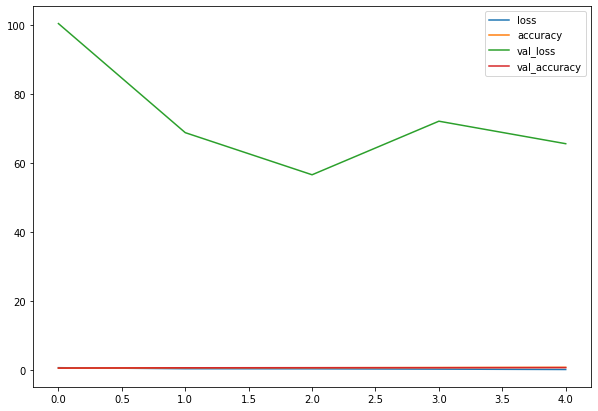

In [ ]:
#Let's plot the training history then evaluate
#Let's plot the training curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
#plot the validation and training curves separately
def plot_loss_curves(history):
  '''Return separate curves for training and validation'''
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  epochs=range(len(acc))
  plt.plot(epochs,acc,'r',label='Training accuracy')
  plt.plot(epochs,val_acc,'ro--',label='validation_accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()

  
  plt.figure()
  plt.plot(epochs,loss,'b',label='Training loss')
  plt.plot(epochs,val_loss,'bo--',label='validation_loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()


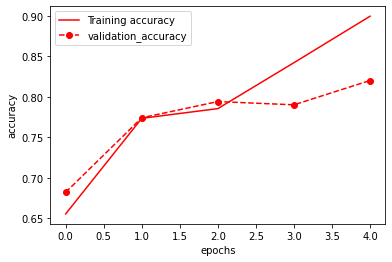

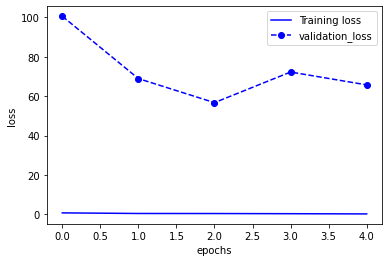

In [ ]:
plot_loss_curves(history_4)

###NOTE THAT VALIDATION LOSS INCREASING IS MORE LIKELY BECAUSE OF OVERFITTING

SO WE ARE GOING TO LOOK AT WAYS TO REDUCE OVERFITTING

# 6. ADJUST THE MODEL PARAMETERS
Fitting a ML model comes in 3 steps.
0. Create a baseline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

Ways to induce overfitting:
* Increasing the number of conv.layers
* Increase the number of conv. filter.
* Add another dense layer to the ouput of our flattened layer.


Reduce Overfitting

* Add data augmentation.
* Add regularization layers(such as MaxPool2D)
* add more data

In [ ]:
 #Create the model(this is going to be our new baseline )
 from keras.models import Sequential
 from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
 model_5=Sequential([
     Conv2D(10,(3,3),activation='relu',input_shape=(224,224,3)),
     MaxPooling2D(2,2),
     Conv2D(10,(3,3),activation='relu'),
     MaxPooling2D(2,2),
     Conv2D(10,(3,3),activation='relu'),
     MaxPooling2D(2,2),
     Flatten(),
     Dense(1,activation='sigmoid')
 ])

In [ ]:
#Compile the model
model_5.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_5=model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.6279 - accuracy: 0.6347 - val_loss: 116.0613 - val_accuracy: 0.6100
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4459 - accuracy: 0.7953 - val_loss: 103.0254 - val_accuracy: 0.6880
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4061 - accuracy: 0.8060 - val_loss: 95.4121 - val_accuracy: 0.7140
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3912 - accuracy: 0.8313 - val_loss: 41.4963 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3616 - accuracy: 0.8413 - val_loss: 62.8887 - val_accuracy: 0.7880


In [ ]:
#Get the summary of adding the regularizer max pooling layer that reduces overfititing
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 flatten_3 (Flatten)         (None, None)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


Despite having 50* more less trainable parameters the one with maxpooling outperforms the model_4

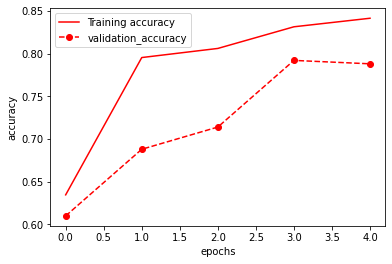

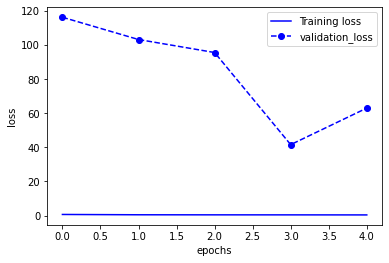

In [ ]:
#plot loss curves
plot_loss_curves(history_5)

We are now trying to align the train curve to he validation curve and reduce overfitting first using data augmentation.

In [ ]:
#Create ImagaDataGenerator training and validation instaces
from keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented= ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1./255)
#Create without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1./255)

**Question:** What is data augmentation

Data augmentation is the process oof altering the traininig data leading it to have more diversity and in turn allowing our models to learn more adjusting the rotation,shear,zoom,width_shift,height_shift,flip ranges.

**Let's visualize data augmentation ?**

In [ ]:
#Import data and augment it from training directory
print('Augmented training data')
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode='binary',shuffle=True)
#WE shuffled for the purposes of demonstration because usually randomness is needed when working with datas.
#Create a non augmented bacthes of data
print('Non Augmented training data')
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode='binary',shuffle=True)
#Create the non_augmented test data batches
test_data= test_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode='binary')


Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training data
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


** *NOTE:* ** Data augmentation is usually only performed on the training data.

Using the generator built in data augmentation parameteres our images are left as they are in the directories but are modified as they are fed to the model.


Let's visualize some augmented data!!



In [ ]:
# Get sample data batches
images,labels= train_data.next()
augmented_images,augmented_labels=train_data_augmented.next() #NOTE that it's just for names labels are not augmented


showing image number:19
showing augmented image number:19


(-0.5, 223.5, 223.5, -0.5)

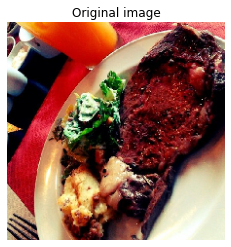

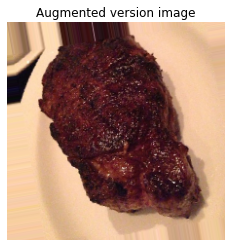

In [ ]:
#Show the original image and augmented image
import random
random_number=random.randint(0,32) # Our batches are 32
print(f'showing image number:{random_number}')
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
print(f'showing augmented image number:{random_number}')
plt.imshow(augmented_images[random_number])
plt.title('Augmented version image')
plt.axis(False)

Let's train the model with augmented data


In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from tensorflow.keras.models import Sequential
model_6= Sequential([
    Conv2D(10,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(10,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(10,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1,activation='sigmoid')
])
optimizer=tf.keras.optimizers.Adam()
model_6.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history_6=model_6.fit(train_data,epochs=5,steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 0.6046 - accuracy: 0.6660 - val_loss: 0.5130 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4796 - accuracy: 0.7840 - val_loss: 0.4142 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4120 - accuracy: 0.8227 - val_loss: 0.3502 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4140 - accuracy: 0.8227 - val_loss: 0.3375 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3570 - accuracy: 0.8500 - val_loss: 0.3301 - val_accuracy: 0.8680


In [ ]:
def plot_loss_curves2(history):
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  epochs=range(len(acc))
  plt.plot(epochs,acc,'r',label='training_accuracy')
  plt.plot(epochs,val_acc,'b',label='validation accuracy')
  plt.legend()
  plt.figure()
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  plt.plot(epochs,loss,'r',label='training loss'),
  plt.plot(epochs,val_loss,'b',label='validation loss')
  plt.legend()

Check our model training curves

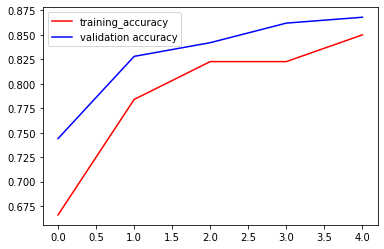

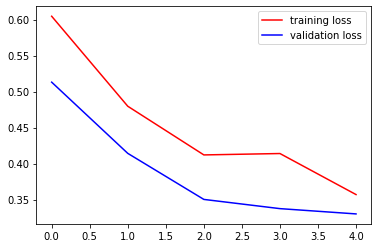

In [ ]:
plot_loss_curves2(history_6)

It may not be overfitting but the accuracy is too low so maybe we need to reduce the no. of augmentation used to increase accuracy but always avoid overfitting.

But let's get back and shuffle=true for the generator and watch the results.

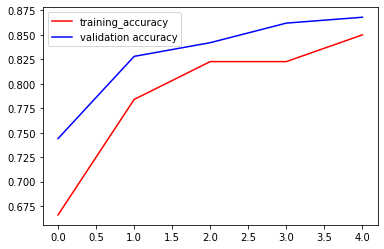

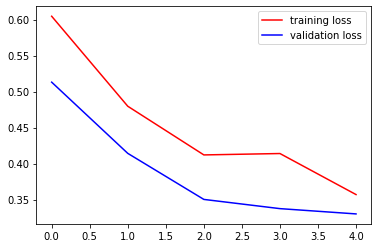

In [ ]:
plot_loss_curves2(history_6)

### As we can see shuffling the data as it's augmented, **shuffle=True**, as it's default gives better results. That does not **OVERFIT** and also importantly it's **ACCURACY** is better. Learning from both pizza and steak simultaneously. Instead of doing pizza then go to steak.

What will happen if we used the model architecture that is in the CNN explainer website...Does it get better than model_6?

Well, let's see

In [ ]:
model_7=Sequential([
     Conv2D(10,(3,3),activation='relu',input_shape=(224,224,3)),
     Conv2D(10,(3,3),activation='relu'),
     MaxPooling2D(2,2),
     Conv2D(10,(3,3),activation='relu'),
     Conv2D(10,(3,3),activation='relu'),
     MaxPooling2D(2,2),
     Flatten(),
     Dense(1,activation='sigmoid')
])
model_7.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
history_7=model_7.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 24s 493ms/step - loss: 0.6612 - accuracy: 0.6333 - val_loss: 0.5154 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 24s 509ms/step - loss: 0.5457 - accuracy: 0.7373 - val_loss: 0.4366 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 23s 482ms/step - loss: 0.5161 - accuracy: 0.7560 - val_loss: 0.4093 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 23s 480ms/step - loss: 0.5022 - accuracy: 0.7587 - val_loss: 0.4108 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 23s 480ms/step - loss: 0.4969 - accuracy: 0.7660 - val_loss: 0.3644 - val_accuracy: 0.8560


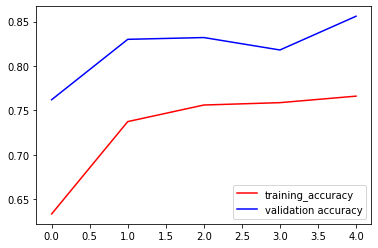

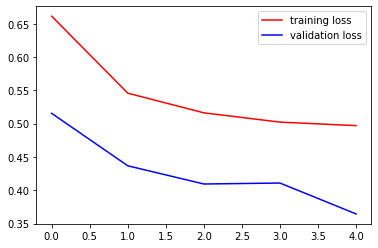

In [ ]:
plot_loss_curves2(history_7)

###We can see that clearly our previous model_6 is better than model_7.

#Making a prediction with our trained model on our custom data


In [ ]:
#Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-11-20 09:44:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2022-11-20 09:44:38 (71.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

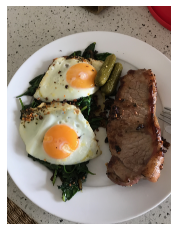

In [ ]:
#View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak= mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
#Check the shape of our image
steak.shape

(4032, 3024, 3)

**NOTE:** when you train a NN and want to make prediction on your custom data , it needs to be preprocessed like the training data it was trained on.

In [ ]:
def load_prep_image(file_name,img_shape=224):
  '''Reads an image from a filename and reshape it'''
 #Read in the image 
  img=tf.io.read_file(file_name)
 #Decode the read file into a tensor
  img=tf.image.decode_image(img)
 #resice the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
 #rescale the image(get all values between 0 and 1)
  img=img/255.
  return img

In [ ]:
 model_7.predict(steak)

ValueError: ignored

Causes an error because the image is missing the batch dimension

In [ ]:
#Load and preprocess custom images
steak=load_prep_image('/content/03-steak.jpeg')



In [ ]:
pred=model_7.predict(tf.expand_dims(steak,axis=0)) # What is we add a dim to it's first diemnsion

We have got the prediction probabilities
But we still need a way to understand this prediction probability into something we understand


In [ ]:
#Remind ourselves of our classnames
class_names


In [ ]:
#We can index in this class names array by rounding the prediction probability.
pred_class=class_names[int(tf.round(pred))]

In [ ]:
pred_class

In [ ]:
# NOw let's create a function for it
def pred_and_plot(model,file_name,class_names=class_names):
  '''Imports an image located at filename,makes a prediction with the model and plots the image 
  with the predicted class as the title.'''
  #IMport the target image and preprocess it
  img=load_prep_image(file_name)
  #make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))
  #round the prediction
  pred_class=class_names[int(tf.round(pred))]
  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f'prediction:{pred_class}')
  plt.axis(False)


In [ ]:
#Test our model on a custom image
pred_and_plot(model_7,'03-steak.jpeg')

Our model works! Let's try it on another image

In [ ]:
#Download another custom test image and make prediction on it and plot it
!wget raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,'03-pizza-dad.jpeg')


Our model works! Let's try it on another image...this time pizza

# MULTI CLASS CLASSIFICATION MODEL

WE've just been through this steps with the binary classification model but we are going t make it for multi class classification now.

1. Become one with the data

2. preprocess the data(get it ready for a model)
3. Create a model(start with the baseline)
4. Fit the model(overfit it to make sure it works)
5. Evaluate the model.
6. Adjust different hyperparameteres and improve the model.
7. Repeat until satisfied.



#1. Become one with the data.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref=zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2022-11-20 10:02:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.4MB/s    in 22s     

2022-11-20 10:02:45 (22.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
!ls 10_food_classes_all_data

test  train


In [ ]:
!ls 10_food_classes_all_data/train

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [ ]:
!ls 10_food_classes_all_data/train/hamburger

In [ ]:
import os
for dir_path,dir_names,file_names in os.walk('10_food_classes_all_data'):
  print(f"The total number of images in {dir_path}, is {len(file_names)} and the total amount of directories is {len(dir_names)}")

The total number of images in 10_food_classes_all_data, is 0 and the total amount of directories is 2
The total number of images in 10_food_classes_all_data/train, is 0 and the total amount of directories is 10
The total number of images in 10_food_classes_all_data/train/chicken_curry, is 750 and the total amount of directories is 0
The total number of images in 10_food_classes_all_data/train/grilled_salmon, is 750 and the total amount of directories is 0
The total number of images in 10_food_classes_all_data/train/chicken_wings, is 750 and the total amount of directories is 0
The total number of images in 10_food_classes_all_data/train/hamburger, is 750 and the total amount of directories is 0
The total number of images in 10_food_classes_all_data/train/sushi, is 750 and the total amount of directories is 0
The total number of images in 10_food_classes_all_data/train/fried_rice, is 750 and the total amount of directories is 0
The total number of images in 10_food_classes_all_data/trai

In [ ]:
#Let's see for example how many images are there in train/hamburger dir path
print(len(os.listdir('10_food_classes_all_data/train/hamburger')))


750


In [ ]:
#setup the train and test directories
train_dir='10_food_classes_all_data/train'
test_dir='10_food_classes_all_data/test'

In [ ]:
#Visualize visuaize
#Define class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
#Let's visualize 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_image2(target_dir,target_class):
  target_folder=target_dir+"/"+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape:{img.shape}")
  return img


['703677.jpg']
Image shape:(340, 512, 3)


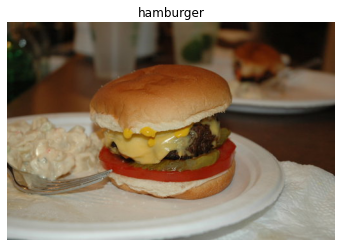

In [ ]:
img=view_random_image2(train_dir,'hamburger')
#Or we can use the 'random.choice(class_names)' to view random choices of the target classes!

In [ ]:
# WE have now seen the randomly picked images out of the 750 training images for each class
#But we have also seen that they come in d/t shapes and sizes
#So we need to pre process them in order to feed our neural networks


#3. Preprocess the data

In [ ]:
# Whe we say preprocess we mean by normalizing and scaling and also batching our data comes in
tf.random.set_seed(42)
from keras.preprocessing.image import ImageDataGenerator
train_datagen3=ImageDataGenerator(rescale=1./255,rotation_range=40,height_shift_range=0.2,
                                  width_shift_range=0.2,shear_range=0.2,zoom_range=0.1,
                                  horizontal_flip=True,fill_mode='nearest')
test_datagen3=ImageDataGenerator(rescale=1./255)

In [ ]:
train_data=train_datagen3.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),
                                              class_mode='categorical')
test_data=test_datagen3.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),
                                            class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#4. Create the CNN model

Now that we have preprocessed our data we need to feed it to some kind of network.
 
Creating the baseline model to beat.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
model_10=Sequential([
    Conv2D(10,(3,3),activation='relu',input_shape=(224,224,3)),
    Conv2D(10,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(10,(3,3),activation='relu'),
    Conv2D(10,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10,activation='softmax')
    ])
model_10.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
hitory_10=model_10.fit(train_data,steps_per_epoch=len(train_data),
                       epochs=6,validation_data=test_data,
                       validation_steps=len(test_data))



Epoch 1/6
235/235 [==============================] - 114s 483ms/step - loss: 2.2097 - accuracy: 0.1808 - val_loss: 2.0323 - val_accuracy: 0.2948
Epoch 2/6
235/235 [==============================] - 110s 467ms/step - loss: 2.0572 - accuracy: 0.2680 - val_loss: 1.9331 - val_accuracy: 0.3368
Epoch 3/6
235/235 [==============================] - 130s 556ms/step - loss: 1.9925 - accuracy: 0.3063 - val_loss: 1.8561 - val_accuracy: 0.3520
Epoch 4/6
235/235 [==============================] - 144s 613ms/step - loss: 1.9720 - accuracy: 0.3133 - val_loss: 1.8314 - val_accuracy: 0.3744
Epoch 5/6
235/235 [==============================] - 136s 578ms/step - loss: 1.9390 - accuracy: 0.3140 - val_loss: 1.8400 - val_accuracy: 0.3664
Epoch 6/6
235/235 [==============================] - 115s 490ms/step - loss: 1.9211 - accuracy: 0.3296 - val_loss: 1.7508 - val_accuracy: 0.4080


#5. Evaluating our model's performance


In [ ]:
# We will define a function to evaluate the losses and accuracy and tell if it's overfitting or underfitting?
def plot_loss_curves3(history):
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  epochs=range(len(acc))
  plt.plot(epochs,acc,'r',label='Training_accuracy')
  plt.plot(epochs,val_acc,'b',label='validation_accuracy')
  plt.title('Training_and_validation_accuracy')
  plt.legend()
  plt.figure()
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  plt.plot(epochs,loss,'b',label='Training_loss')
  plt.plot(epochs,val_loss,'r',label='Validation_loss')
  plt.title('Training_and_validation_loss')
  plt.legend()

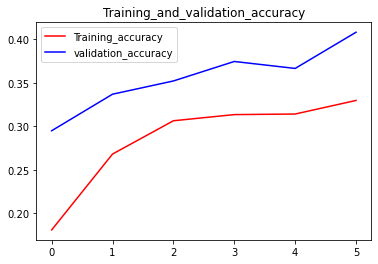

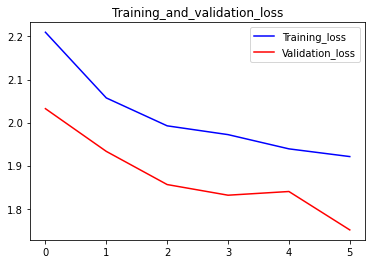

In [ ]:
plot_loss_curves3(hitory_10)

#6. Adjust the model parameters

Right now our model doesn't seem to be overfitting and is currently underfitting. 

**Measure to apply during underfitting**
1. Adding more layers,units.
2. Change the activation function.
3. Change the optimization function.
4. Change the learning rate.
5. Fit on more data.
6. Fit for longer.
 
For our case i think, training for longer is gonna boost the accuracy.

**WE ARE NOT GOING TO DO THE ABOVE MEASURES BECAUSE OF SLOW FITTING THAT TAKES TIME. BUT FEEL FREE TO TWEAK THEM.** 

**AND IF IT GOES OVERFITTING WE CAN DO THE FOLLOWING TO DECREASE COMPLICATIONS**
1. *GET MORE DATA*
2. *SIMPLIFY THE MODEL(REDUCE NO. OF LAYERS,HIDDEN UNITS)*
3. *DATA AUGMENTATION*
4. *TRANSFER LEARNING*


WE CAN ALWAYS USE CLONING RATHER THAN WRITING AGAIN.

In [ ]:
#CLONING ONLY copies the structure not the learned features.
#example
model_11=tf.keras.models.clone_model(model_10)


In [ ]:
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_27 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_29 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

As you can see it has the same structure but resets all the learned features of the model_10. So, *tf.keras.models.clone_model* **ONLY CLONES THE STRUCTURE**

#7. Repeat until satisfied.
 We could keep going until the training and validation curves get closer.
 
 How?

 . Train for longer.
 . Training for longer.
 . Add layers or hidden units.
 . Fit on more data.
 . Use transfer learning.

 But what would be optimal time wise for our case maybe transfer learning rather than increasing our training time.

#8. Make Prediction

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
#Download images from different classes
#pizza,sushi,steak,hamburger
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg


--2022-11-20 13:35:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-11-20 13:35:57 (184 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-11-20 13:35:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

In [ ]:
#Function to load and preprocess the data for us before giving it to the model
def load_and_prep_image(file_name,img_shape=224):
  img=tf.io.read_file(file_name)
  img=tf.image.decode_image(img)
  print("Initial shape:",img.shape)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255
  return img

A new pred and plot function for multi class classification.

In [ ]:
#Fuction to allow to make the model prediction
#Reconfigured pred and plot function

def pred_and_plot(model,file_name,class_names=class_names):
  img=load_and_prep_image(file_name)
  pred=model.predict(tf.expand_dims(img,axis=0))
  if len(pred[0])>1:
     pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred[0]))]
  plt.imshow(img)
  plt.title(f'prediction:{pred_class}')
  plt.axis(False)

Initial shape: (4000, 6000, 3)
1/1 [==============================] - 0s 165ms/step


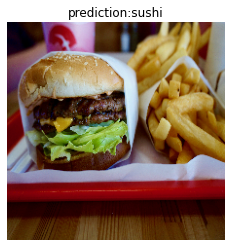

In [ ]:
pred_and_plot(model_10,'03-hamburger.jpeg')

##Clearly we have a poor model but we can always improve it. Don't worry, In the next module we will use transfer learning to get the predictions through the roof.

#9. Save and loading our model

In [ ]:
model_10.save("saved_trained_model_10")

In [ ]:
#Loading a trained model and evaluate it
loaded_model_10=tf.keras.models.load_model("saved_trained_model_10")

In [ ]:
loaded_model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_27 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_29 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [ ]:
# In the next module we are going to boost the accuracy using TRANSFER LEARNING